In [23]:
import pandas as pd, datetime
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import folium
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales=pd.read_csv('train.csv')
output=pd.read_csv('sample-output.csv')

In [3]:
sales['Order Date']=pd.to_datetime(sales['Order Date'])
last_date=sales['Order Date'].max()

In [4]:
sales.sort_values(by=['Order Date'],inplace=True)

In [5]:
totalweek=0
sales['week']=[None]*sales.shape[0]
for i in range(2015,2019):
    sales['week'].loc[sales['Order Date'].dt.year==i]=sales['Order Date'].dt.week + totalweek
    totalweek=totalweek + sales[sales['Order Date'].dt.year==2015]['Order Date'].dt.week.max()
    
sales['week_year']=sales['Order Date'].dt.week

In [6]:
sales.set_index('Order Date',inplace=True)

In [7]:
my_colors = ['blue','yellow','orange','violet','indigo','red','green']

Text(0.5, 1.0, 'Sales on Catgeories')

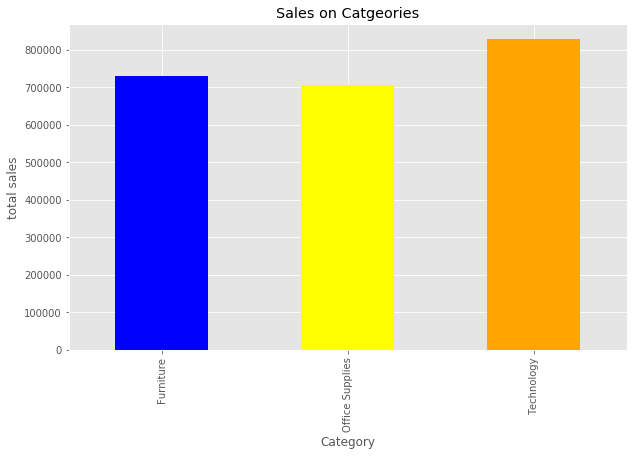

In [8]:
plt.style.use('ggplot')
sales.groupby(['Category']).sum()['Sales'].plot(kind='bar',color=my_colors,figsize=(10,6))
plt.ylabel('total sales')
plt.title('Sales on Catgeories')

Text(0.5, 1.0, 'Sales on Sub-Catgeories')

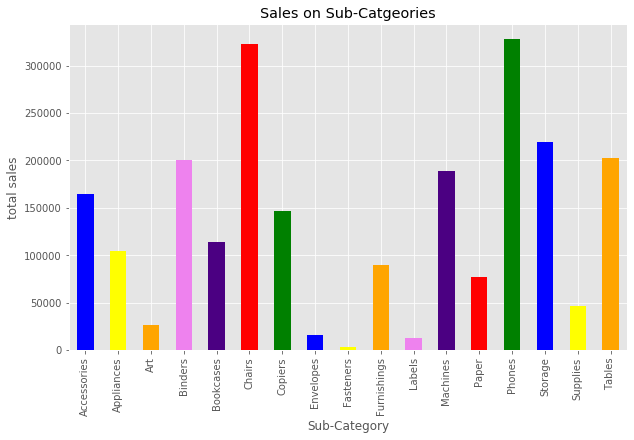

In [9]:
plt.style.use('ggplot')
sales.groupby(['Sub-Category']).sum()['Sales'].plot(kind='bar',color=my_colors,figsize=(10,6))
plt.ylabel('total sales')
plt.title('Sales on Sub-Catgeories')

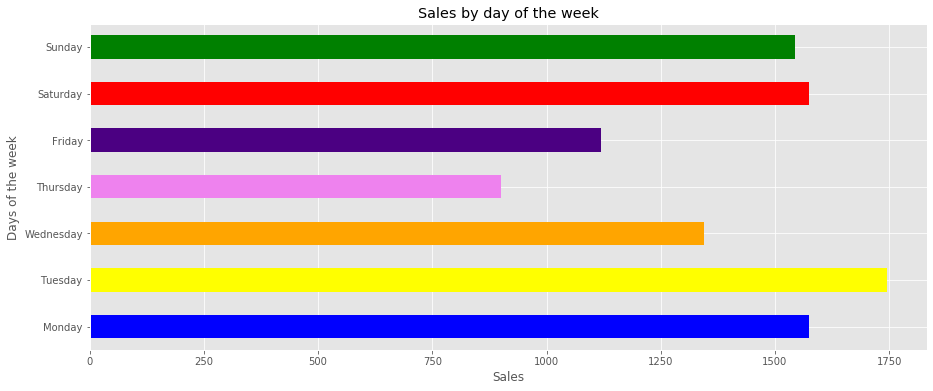

In [10]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
sales.groupby([sales.index.dayofweek]).size().plot(kind='barh',color=my_colors,figsize=(15,6))
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Sales')
plt.title('Sales by day of the week')
plt.show()

In [11]:
avg=[]
weeks=sales['week'].unique()
for week in weeks:
    mean=sales[sales['week']==week]['Sales'].mean()
    avg.append(mean)

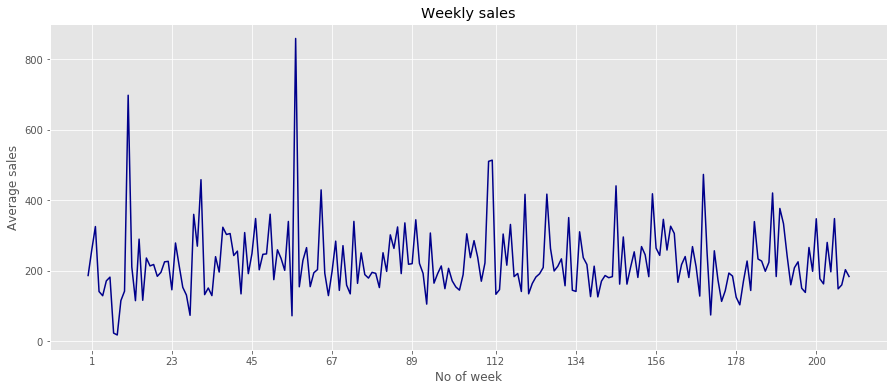

In [12]:
fig=plt.figure(figsize=(15,6))
x=list(range(210))
plt.plot(x,avg,color='darkblue')
plt.xlabel('No of week')
plt.ylabel('Average sales')
plt.xticks(np.round(np.linspace(1,200,10)))
plt.title('Weekly sales')
plt.style.use('ggplot')

Text(0.5, 1.0, 'Monthly sales')

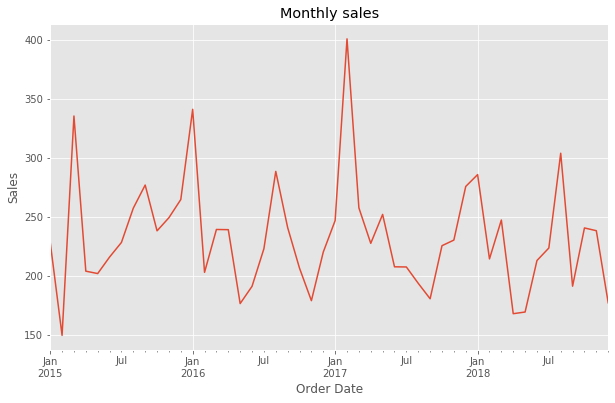

In [13]:
sales.Sales.resample('M').mean().plot(figsize=(10,6))
plt.ylabel('Sales')
plt.title('Monthly sales')

In [14]:
df=sales[['Sales']]
df.head()
df=df.groupby(pd.Grouper(freq='D')).sum()

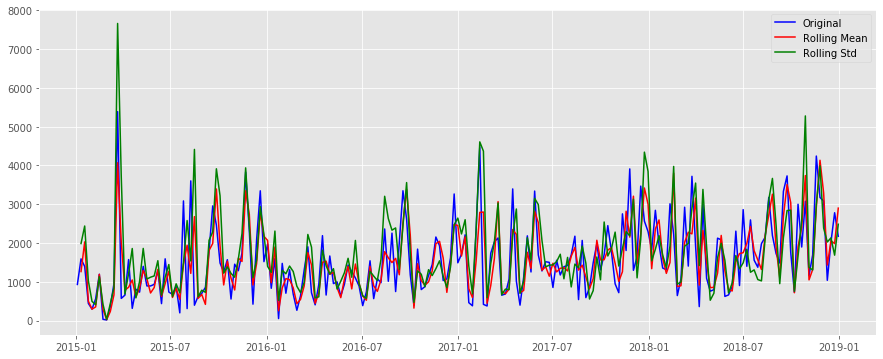

Results of Dickey-Fuller Test:
ADF Statistic: -13.849714
p-value: 0.000000
Critical Values:
1% -3.434858527373781
5% -2.8635312133080046
10% -2.567830105465636


In [15]:
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()
# Plotting rolling statistics:
    fig=plt.figure(figsize=(15,6))
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
  # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)
# Testing stationarity of store type a
test_stationarity(df)

In [16]:
def plot_timeseries(sales):
    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    decomposition= seasonal_decompose(sales, model = 'additive',freq=365)
    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');
    plt.title('Decomposition Plots')

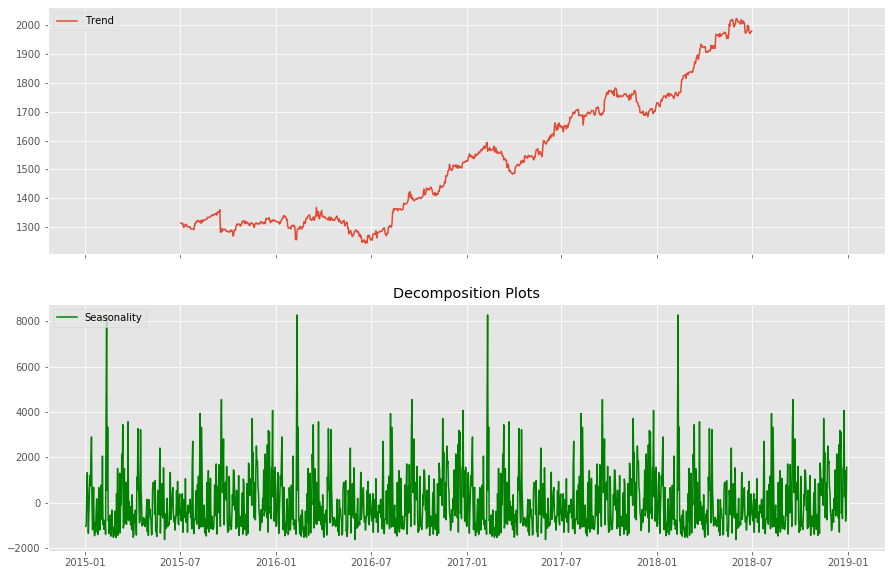

In [17]:
plot_timeseries(df)

In [36]:
City=sales.groupby(['City']).sum()
City=City[['Sales']]
top_cities=City.sort_values('Sales',ascending=False).head(10).index
Cities=sales[sales.City.isin(top_cities)]

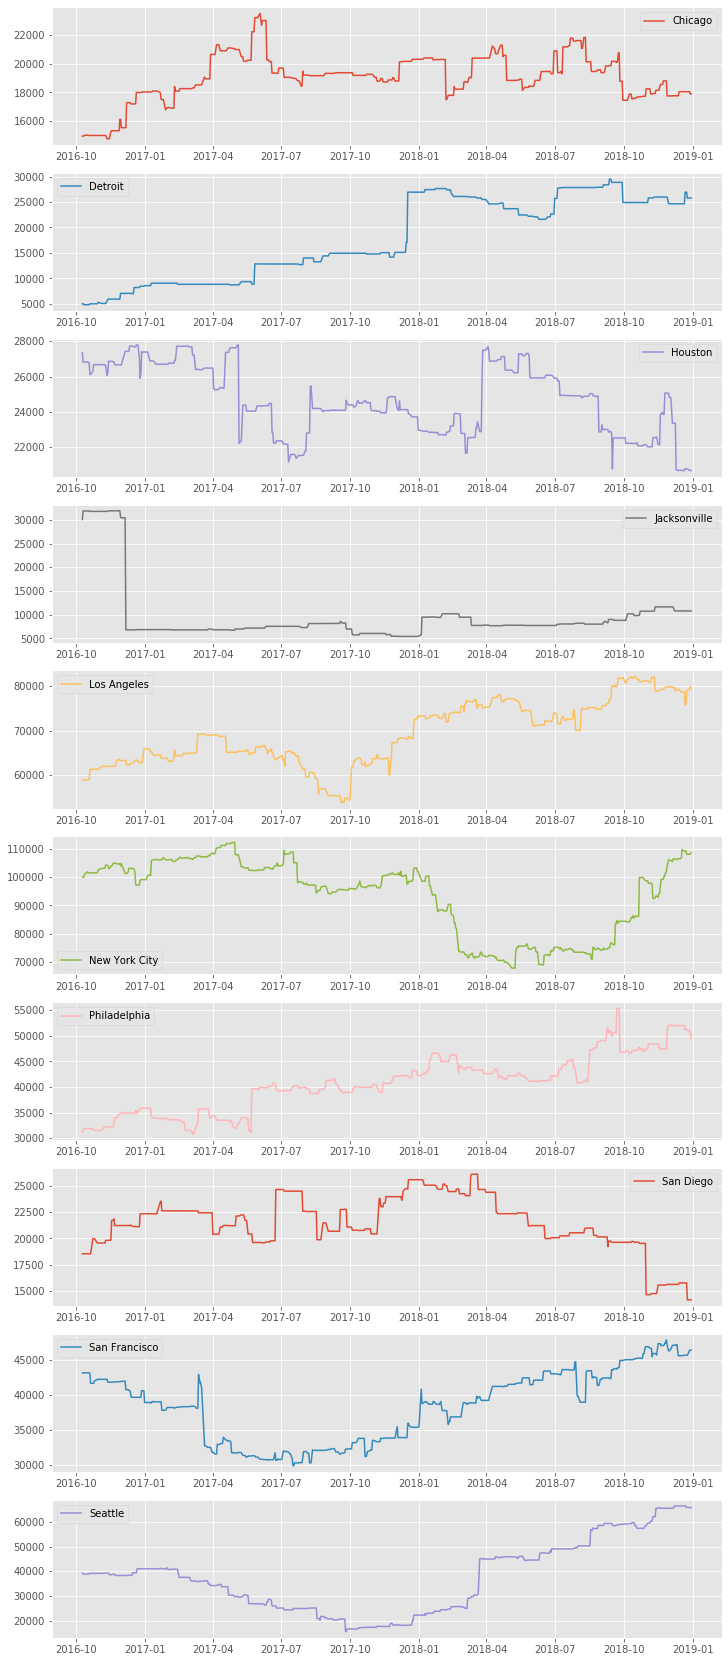

In [20]:
City_Sales_date = Cities.pivot_table('Sales', aggfunc=np.sum, columns='City', index=Cities.index.date, fill_value=0)
City_Sales_date.index = pd.DatetimeIndex(City_Sales_date.index)
plo = City_Sales_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 1), sharex=False, sharey=False)

In [62]:
loc=[(40.7128, -74.0060),(34.0522, -118.2437),(47.6062, -122.3321),(37.7749,-122.4194),(39.9526,-75.1652),(29.7604,-95.3698),
     (41.8781,-87.6298),(32.7157, -117.1611),(30.3322, -81.6557),(42.3314,-83.0458)]
map_cities=sales.groupby('City').sum()['Sales']
map_cities=pd.DataFrame(map_cities)
map_cities.sort_values('Sales',ascending=False,inplace=True)
map_cities=map_cities.head(10)
map_cities['Location']=loc
map_cities.head()

,Sales,Location
City,,
New York City,252462.547,"(40.7128, -74.006)"
Los Angeles,173420.181,"(34.0522, -118.2437)"
Seattle,116106.322,"(47.6062, -122.3321)"
San Francisco,109041.120,"(37.7749, -122.4194)"
Philadelphia,108841.749,"(39.9526, -75.1652)"


In [67]:
world_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4,tiles='Stamen Toner')
incidents = folium.map.FeatureGroup()
for (lat, lng),label in zip(map_cities['Location'].values,map_cities.index):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            popup=label,
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
# display map
world_map.add_child(incidents)
world_map